# TME 3 - Descente de gradient

### Algorithme de descente de gradient
x t+1 = x t −  ∗ ∇f(x t ).

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def optimize(fonc,dfonc,xinit,eps,max_iter):
    x_histo = []
    f_histo = []
    grad_histo = []
    dernier = xinit
    for i in range(max_iter):
        x_histo.append(dernier - (eps * dfonc(dernier)))
        f_histo.append(fonc(dernier))
        grad_histo.append(dfonc(dernier))
        dernier = x_histo[i]
    return (np.array(x_histo), np.array(f_histo), np.array(grad_histo))

### Tests
f(x) = x cos(x)

f(x)' = cos(x) - x sin(x)

In [5]:
def fonc(x):
    return x * np.cos(x)

def dfonc(x):
    return np.cos(x) - x * np.sin(x)

def fonc2(x):
    return -np.log(x) + x**2

def dfonc2(x):
    return -1/x + 2*x

## f(x) = x cos(x)

In [18]:
def visualise1d(params, f, eps, xr,i, optimal):
    x_histo,f_histo,grad_histo = params
    
    plt.figure()
    plt.title(eps)
    plt.plot(xr, [f(x) for x in xr])
    plt.plot(x_histo, f_histo)
    plt.xlabel("x")
    plt.xlabel("f(x)")
    plt.savefig('../compte_rendu/TME1_6/images/tme3/descente_'+str(i)+'.png')
    plt.figure()
    plt.plot(range(len(x_histo)), [np.log(np.linalg.norm(x - optimal)) for x in x_histo])
    plt.savefig('../compte_rendu/TME1_6/images/tme3/descente_error_'+str(i)+'.png')

In [19]:
x_histo,f_histo,grad_histo = optimize(fonc, dfonc, 1, 0.05, 50)
optimal = x_histo[f_histo.argmin()]
print("f optimal %f à x=%f" % (fonc(optimal),optimal))

xr = np.linspace(-1,5,1000)
explication = [', le pas de gradient trop pétit', ', le pas assez optimale', ', trop grande']
for i,eps in enumerate([-0.1, 0.05,0.6]):
    visualise1d(optimize(fonc, dfonc, 1, eps, 50), fonc, str(eps) + explication[i], xr,i, optimal)

f optimal -3.288296 à x=3.419348


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log


3.4193480295900489

## f(x)' = cos(x) - x sin(x)

/Users/samutamminen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


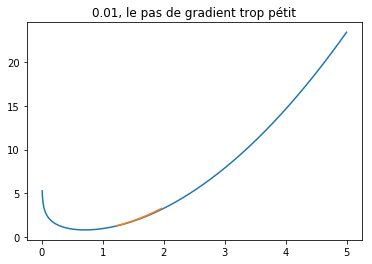

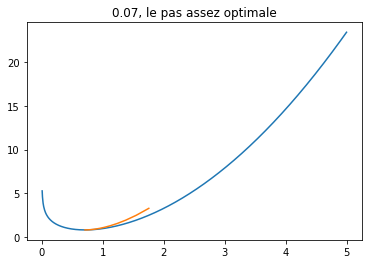

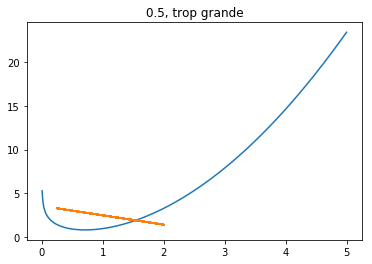

f optimal 0.846574 à x=0.707264


/Users/samutamminen/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


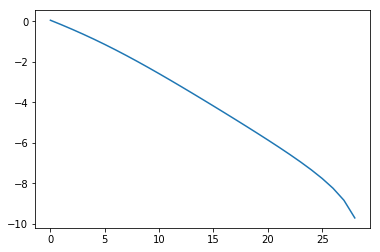

In [163]:
xr = np.linspace(0,5,1000)
explication = [', le pas de gradient trop pétit', ', le pas assez optimale', ', trop grande']
for i,eps in enumerate([0.01, 0.07,0.5]):
    visualise1d(optimize(fonc2, dfonc2, 2, eps, 30), fonc2, str(eps) + explication[i], xr)

x_histo,f_histo,grad_histo = optimize(fonc2, dfonc2, 2, 0.07, 30)
optimal = x_histo[f_histo.argmin()]
print("f optimal %f à x=%f" % (fonc2(optimal),optimal))
    
plt.figure()
plt.plot(range(len(x_histo)), [np.log(np.linalg.norm(x - optimal)) for x in x_histo])
plt.show()

array([ 1.        ,  0.99015034,  0.98088567,  0.97217491,  0.96398836,
        0.95629767,  0.94907583,  0.94229706,  0.9359368 ,  0.92997167,
        0.9243794 ,  0.91913881,  0.91422975,  0.90963309,  0.90533066,
        0.90130518,  0.8975403 ,  0.89402048,  0.89073103,  0.887658  ,
        0.88478822,  0.88210922,  0.8796092 ,  0.87727703,  0.8751022 ,
        0.87307476,  0.87118538,  0.86942522,  0.86778597,  0.86625981,
        0.86483937,  0.86351774,  0.86228839,  0.86114522,  0.86008248,
        0.8590948 ,  0.85817711,  0.85732468,  0.85653307,  0.85579812,
        0.85511596,  0.85448292,  0.85389563,  0.85335088,  0.85284571,
        0.85237734,  0.85194318,  0.85154081,  0.85116798,  0.85082258,
        0.85050266,  0.85020638,  0.84993205,  0.84967809,  0.84944301,
        0.84922545,  0.84902413,  0.84883788,  0.84866558,  0.84850621,
        0.84835882,  0.84822253,  0.84809652,  0.84798002,  0.84787234,
        0.84777281,  0.84768082,  0.84759583,  0.84751729,  0.84

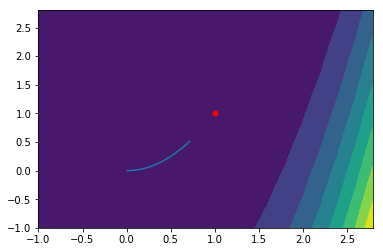

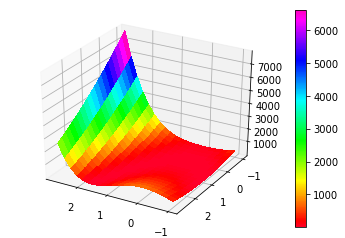

f optimal [ 0.84672694  0.93236713] à x=[ 0.7158812   0.51114934]


In [200]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5,step=20,data=None):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :return: une matrice 2d contenant les points de la grille, la liste x, la liste y
    """
    if data is not None:
        xmax,xmin,ymax,ymin = np.max(data[:,0]),np.min(data[:,0]),\
                              np.max(data[:,1]),np.min(data[:,1])
    x,y = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step),
                      np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

dt=np.float

fonc3 = lambda x: 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
dfonc3 = lambda x: np.array([2*(200*x[0]**3 - 200*x[0]*x[1] + x[0] - 1), 200*(x[1]-x[0]**2)], dtype=dt)

x_histo3,f_histo3,grad_histo3 = optimize(fonc3, dfonc3, np.array([0,0], dtype=dt), 0.004, 300)

mafonction = lambda xr : np.array([fonc3(x) for x in xr])
grid,xx,yy = make_grid(-1,3,-1,3,20)
plt.figure()
plt.contourf(xx,yy,mafonction(grid).reshape(xx.shape))

x = x_histo3[:,0]
y = x_histo3[:,1]

plt.plot(x,y)

# minimum selon Wolframalpha
plt.plot([1], [1], marker='o', markersize=5, color="red")

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(30, 120)
surf = ax.plot_surface(xx, yy, mafonction(grid).reshape(xx.shape),rstride=1,cstride=1,\
cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.show()

optimal = x_histo3[f_histo3.argmin()]
print("f optimal %s à x=%s" % (fonc2(optimal),optimal))

array([ 0.7158812 ,  0.51114934])